In [1047]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix
import time
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [1048]:
df=pd.read_csv('a3 (2).csv')
df

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [1049]:
df1 = df.columns
df1

Index(['842302', 'M', '17.99', '10.38', '122.8', '1001', '0.1184', '0.2776',
       '0.3001', '0.1471', '0.2419', '0.07871', '1.095', '0.9053', '8.589',
       '153.4', '0.006399', '0.04904', '0.05373', '0.01587', '0.03003',
       '0.006193', '25.38', '17.33', '184.6', '2019', '0.1622', '0.6656',
       '0.7119', '0.2654', '0.4601', '0.1189'],
      dtype='object')

In [1050]:
df.columns = ['ID', 'diagnosis', 'F1','F2','F3','F4','F5','F6','F7','F8','F9','F10',
             'F11','F12','F13','F14','F15','F16','F17','F18','F19','F20',
             'F21','F22','F23','F24','F25','F26','F27','F28','F29','F30']
df

,ID,diagnosis,F1,F2,F3,F4,F5,F6,F7,F8,...,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [1051]:
df2 = {'ID': '842302', 
       'diagnosis': 'M',
       'F1':'17.99', 
       'F2':'10.38', 
       'F3':'122.8', 
       'F4':'1001',
       'F5':'0.1184',
       'F6':'0.2776',
       'F7':'0.3001',
       'F8':'0.1471', 
       'F9': '0.2419',
       'F10':'0.07871', 
       'F11': '1.095', 
       'F12':'0.9053',
       'F13':'8.589',
       'F14':'153.4',
       'F15':'0.006399',
       'F16':'0.04904', 
       'F17':'0.05373',
       'F18':'0.01587', 
       'F19': '0.03003',
       'F20':'0.006193', 
       'F21':'25.38', 
       'F22':'17.33', 
       'F23': '184.6', 
       'F24':'2019', 
       'F25':'0.1622',
       'F26':'0.6656',
       'F27':'0.7119', 
       'F28':'0.2654', 
       'F29':'0.4601', 
       'F30':'0.1189'}
df2

{'ID': '842302',
 'diagnosis': 'M',
 'F1': '17.99',
 'F2': '10.38',
 'F3': '122.8',
 'F4': '1001',
 'F5': '0.1184',
 'F6': '0.2776',
 'F7': '0.3001',
 'F8': '0.1471',
 'F9': '0.2419',
 'F10': '0.07871',
 'F11': '1.095',
 'F12': '0.9053',
 'F13': '8.589',
 'F14': '153.4',
 'F15': '0.006399',
 'F16': '0.04904',
 'F17': '0.05373',
 'F18': '0.01587',
 'F19': '0.03003',
 'F20': '0.006193',
 'F21': '25.38',
 'F22': '17.33',
 'F23': '184.6',
 'F24': '2019',
 'F25': '0.1622',
 'F26': '0.6656',
 'F27': '0.7119',
 'F28': '0.2654',
 'F29': '0.4601',
 'F30': '0.1189'}

In [1052]:
df = df.append(df2, ignore_index = True)
df

,ID,diagnosis,F1,F2,F3,F4,F5,F6,F7,F8,...,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30
0,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902
1,84300903,M,19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974,0.1279,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,...,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173
3,84358402,M,20.29,14.34,135.1,1297.0,0.1003,0.1328,0.198,0.1043,...,22.54,16.67,152.2,1575.0,0.1374,0.205,0.4,0.1625,0.2364,0.07678
4,843786,M,12.45,15.7,82.57,477.1,0.1278,0.17,0.1578,0.08089,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.1244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926682,M,20.13,28.25,131.2,1261.0,0.0978,0.1034,0.144,0.09791,...,23.69,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
565,926954,M,16.6,28.08,108.3,858.1,0.08455,0.1023,0.09251,0.05302,...,18.98,34.12,126.7,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.0782
566,927241,M,20.6,29.33,140.1,1265.0,0.1178,0.277,0.3514,0.152,...,25.74,39.42,184.6,1821.0,0.165,0.8681,0.9387,0.265,0.4087,0.124
567,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.0,0.0,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0,0.0,0.2871,0.07039


In [1053]:
len(df)

569

In [1054]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         569 non-null    object
 1   diagnosis  569 non-null    object
 2   F1         569 non-null    object
 3   F2         569 non-null    object
 4   F3         569 non-null    object
 5   F4         569 non-null    object
 6   F5         569 non-null    object
 7   F6         569 non-null    object
 8   F7         569 non-null    object
 9   F8         569 non-null    object
 10  F9         569 non-null    object
 11  F10        569 non-null    object
 12  F11        569 non-null    object
 13  F12        569 non-null    object
 14  F13        569 non-null    object
 15  F14        569 non-null    object
 16  F15        569 non-null    object
 17  F16        569 non-null    object
 18  F17        569 non-null    object
 19  F18        569 non-null    object
 20  F19        569 non-null    objec

In [1055]:
df.value_counts()

ID      diagnosis  F1     F2     F3     F4      F5       F6       F7       F8       F9      F10      F11     F12     F13    F14    F15       F16       F17      F18       F19      F20       F21    F22    F23    F24     F25      F26      F27      F28      F29     F30    
8670    M          15.46  19.48  101.7  748.9   0.1092   0.1223   0.1466   0.08087  0.1931  0.05796  0.4743  0.7859  3.094  48.31  0.00624   0.01484   0.02813  0.01093   0.01397  0.002461  19.26  26.0   124.9  1156.0  0.1546   0.2394   0.3791   0.1514   0.2837  0.08019    1
926954  M          16.6   28.08  108.3  858.1   0.08455  0.1023   0.09251  0.05302  0.159   0.05648  0.4564  1.075   3.425  48.55  0.005903  0.03731   0.0473   0.01557   0.01318  0.003892  18.98  34.12  126.7  1124.0  0.1139   0.3094   0.3403   0.1418   0.2218  0.0782     1
925292  B          14.05  27.15  91.38  600.4   0.09929  0.1126   0.04462  0.04304  0.1537  0.06171  0.3645  1.492   2.888  29.84  0.007256  0.02678   0.02071  0.01626   0.0208   0

In [1056]:
df.describe()

,ID,diagnosis,F1,F2,F3,F4,F5,F6,F7,F8,...,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30
count,569,569,569.00,569.00,569.00,569.0,569.0000,569.0000,569.0,569.0,...,569.00,569.0,569.0,569.0,569.0000,569.0000,569.0,569.0,569.0000,569.00000
unique,569,2,457.00,479.00,522.00,539.0,474.0000,537.0000,537.0,543.0,...,457.00,511.0,515.0,544.0,411.0000,529.0000,539.0,492.0,500.0000,535.00000
top,842517,B,12.34,16.85,87.76,512.2,0.1007,0.1206,0.0,0.0,...,12.36,17.7,117.7,733.5,0.1275,0.1486,0.0,0.0,0.3109,0.07427
freq,1,357,4.00,3.00,3.00,3.0,5.0000,3.0000,13.0,13.0,...,5.00,3.0,3.0,2.0,4.0000,3.0000,13.0,13.0,3.0000,3.00000


In [1057]:
df['diagnosis'] = df ['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [1059]:
df['ID'] = df['ID'].astype('int')

In [1060]:
df['diagnosis'] = df['diagnosis'].astype('int')

In [1063]:
df['F1'] = df['F1'].astype('float')
df['F2'] = df['F2'].astype('float')
df['F3'] = df['F3'].astype('float')
df['F4'] = df['F4'].astype('float')
df['F5'] = df['F5'].astype('float')
df['F6'] = df['F6'].astype('float')
df['F7'] = df['F7'].astype('float')
df['F8'] = df['F8'].astype('float')
df['F9'] = df['F9'].astype('float')
df['F10'] = df['F10'].astype('float')
df['F11'] = df['F11'].astype('float')
df['F12'] = df['F12'].astype('float')
df['F13'] = df['F13'].astype('float')
df['F14'] = df['F14'].astype('float')
df['F15'] = df['F15'].astype('float')
df['F16'] = df['F16'].astype('float')
df['F17'] = df['F17'].astype('float')
df['F18'] = df['F18'].astype('float')
df['F19'] = df['F19'].astype('float')
df['F20'] = df['F20'].astype('float')
df['F21'] = df['F21'].astype('float')
df['F22'] = df['F22'].astype('float')
df['F23'] = df['F23'].astype('float')
df['F24'] = df['F24'].astype('float')
df['F25'] = df['F25'].astype('float')
df['F26'] = df['F26'].astype('float')
df['F27'] = df['F27'].astype('float')
df['F28'] = df['F28'].astype('float')
df['F29'] = df['F29'].astype('float')
df['F30'] = df['F30'].astype('float')

# scale data

#  Split the data into train and test set

In [1065]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [1066]:
len(test_set) 

114

In [1067]:
len(train_set) 

455

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'diagnosis'}>,
        <AxesSubplot:title={'center':'F1'}>,
        <AxesSubplot:title={'center':'F2'}>,
        <AxesSubplot:title={'center':'F3'}>,
        <AxesSubplot:title={'center':'F4'}>],
       [<AxesSubplot:title={'center':'F5'}>,
        <AxesSubplot:title={'center':'F6'}>,
        <AxesSubplot:title={'center':'F7'}>,
        <AxesSubplot:title={'center':'F8'}>,
        <AxesSubplot:title={'center':'F9'}>,
        <AxesSubplot:title={'center':'F10'}>],
       [<AxesSubplot:title={'center':'F11'}>,
        <AxesSubplot:title={'center':'F12'}>,
        <AxesSubplot:title={'center':'F13'}>,
        <AxesSubplot:title={'center':'F14'}>,
        <AxesSubplot:title={'center':'F15'}>,
        <AxesSubplot:title={'center':'F16'}>],
       [<AxesSubplot:title={'center':'F17'}>,
        <AxesSubplot:title={'center':'F18'}>,
        <AxesSubplot:title={'center':'F19'}>,
        <AxesSubplot:title={'center

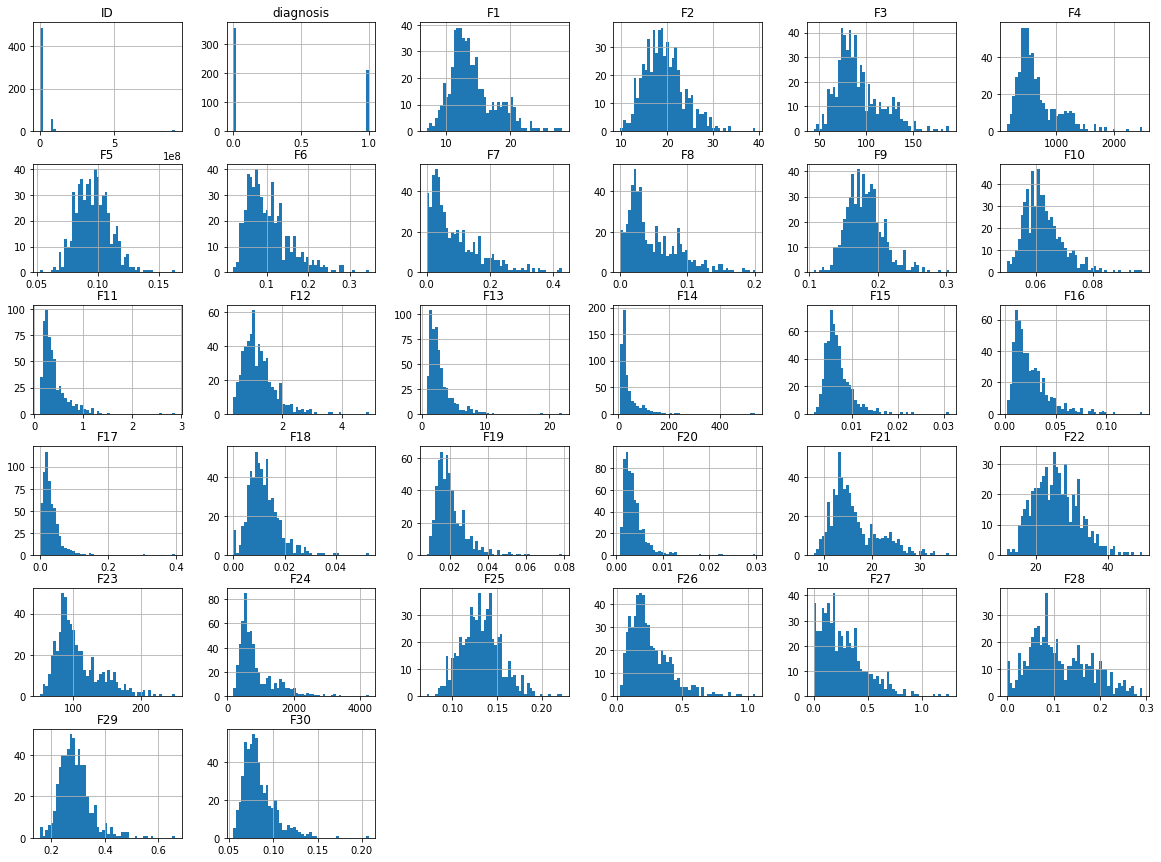

In [1239]:
df.hist( bins=50, figsize=(20,15)) 


In [1240]:
corr_matrix = train_set.corr()
corr_matrix

,ID,diagnosis,F1,F2,F3,F4,F5,F6,F7,F8,...,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30
ID,1.000000,0.052394,0.091797,0.113862,0.091127,0.120544,-0.007312,0.010485,0.068085,0.060112,...,0.096800,0.070199,0.094850,0.126427,0.005391,-0.003940,0.029554,0.037786,-0.068966,-0.033269
diagnosis,0.052394,1.000000,0.733511,0.398048,0.746004,0.717806,0.386350,0.594493,0.683494,0.776167,...,0.778891,0.441886,0.785381,0.739462,0.451524,0.587889,0.654061,0.788783,0.405968,0.309939
F1,0.091797,0.733511,1.000000,0.301199,0.998056,0.987378,0.183968,0.513292,0.661757,0.818474,...,0.971517,0.275476,0.967185,0.941665,0.142156,0.425199,0.529864,0.746658,0.169738,0.008588
F2,0.113862,0.398048,0.301199,1.000000,0.306413,0.300021,0.003922,0.216045,0.275174,0.262797,...,0.323147,0.911522,0.327102,0.312228,0.103649,0.268296,0.280251,0.266697,0.106445,0.119805
F3,0.091127,0.746004,0.998056,0.306413,1.000000,0.986872,0.219992,0.561807,0.700891,0.846858,...,0.971926,0.281392,0.972320,0.943009,0.172484,0.466634,0.567454,0.773931,0.195096,0.051926
F4,0.120544,0.717806,0.987378,0.300021,0.986872,1.000000,0.195415,0.506086,0.674698,0.823175,...,0.968551,0.269780,0.964993,0.965264,0.152214,0.405224,0.521637,0.730426,0.154385,0.008016
F5,-0.007312,0.386350,0.183968,0.003922,0.219992,0.195415,1.000000,0.663996,0.526216,0.568332,...,0.234802,0.065639,0.259159,0.234140,0.804648,0.474982,0.444603,0.514468,0.422650,0.482170
F6,0.010485,0.594493,0.513292,0.216045,0.561807,0.506086,0.663996,1.000000,0.884598,0.838359,...,0.539605,0.237107,0.591177,0.515601,0.563217,0.873871,0.832910,0.822191,0.520297,0.686761
F7,0.068085,0.683494,0.661757,0.275174,0.700891,0.674698,0.526216,0.884598,1.000000,0.914139,...,0.675850,0.275835,0.716281,0.669319,0.451019,0.757399,0.894819,0.853808,0.408197,0.525536
F8,0.060112,0.776167,0.818474,0.262797,0.846858,0.823175,0.568332,0.838359,0.914139,1.000000,...,0.830744,0.267132,0.855579,0.813676,0.468953,0.676430,0.760097,0.912141,0.383954,0.374342


In [1068]:
train_set.isnull().sum()

ID           0
diagnosis    0
F1           0
F2           0
F3           0
F4           0
F5           0
F6           0
F7           0
F8           0
F9           0
F10          0
F11          0
F12          0
F13          0
F14          0
F15          0
F16          0
F17          0
F18          0
F19          0
F20          0
F21          0
F22          0
F23          0
F24          0
F25          0
F26          0
F27          0
F28          0
F29          0
F30          0
dtype: int64

In [1069]:
X_train = (train_set[['ID','F1','F2','F3','F4','F5','F6','F7','F8','F9','F10',
             'F11','F12','F13','F14','F15','F16','F17','F18','F19','F20',
             'F21','F22','F23','F24','F25','F26','F27','F28','F29','F30']])
Y_train = (train_set['diagnosis'])

## Trainning Model 1

# 1- Logistic Regression

In [1020]:
t1_LR = time.time()

In [1021]:
scaler = StandardScaler()
Logistic = LogisticRegression() 
pipe = Pipeline(steps=[("scaler", scaler),("Logistic", Logistic)])
pipe.fit(X_train,Y_train) 

Pipeline(steps=[('scaler', StandardScaler()),
                ('Logistic', LogisticRegression())])

In [1022]:
predictions1 = pipe.predict(X_train)

In [1023]:
t2_LR = time.time()

In [1024]:
train_time_LR= t2_LR-t1_LR
train_time_LR

1.446775197982788

In [1025]:
len(predictions1)

455

In [1026]:
print(accuracy_score(Y_train,predictions1))

0.9934065934065934


In [1027]:
print(classification_report(Y_train,predictions1))
print(confusion_matrix(Y_train,predictions1))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       296
           1       1.00      0.98      0.99       159

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455

[[296   0]
 [  3 156]]


# Train model sgd

In [1120]:
 from sklearn.linear_model import SGDClassifier

In [1167]:
t1_sgd = time.time()

In [1168]:
scaler = StandardScaler() 
sgd = SGDClassifier()
pipe = Pipeline(steps=[("scaler", scaler),("sgd", sgd)])
pipe.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('sgd', SGDClassifier())])

In [1169]:
predictions2 = pipe.predict(X_train)

In [1170]:
t2_sgd = time.time()

In [1171]:
train_time_sgd= t2_sgd-t1_sgd
train_time_sgd

1.4646310806274414

In [1172]:
print(accuracy_score(Y_train,predictions2))

0.989010989010989


In [1173]:
print(classification_report(Y_train,predictions2))
print(confusion_matrix(Y_train,predictions2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       296
           1       0.98      0.99      0.98       159

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455

[[293   3]
 [  2 157]]


# 3- SVC

In [1035]:
t1_SVC = time.time()

In [1036]:
from sklearn.svm import SVC

scaler = StandardScaler() 
svc = SVC()
pipe = Pipeline(steps=[("scaler", scaler),("svc", svc)])
pipe.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

In [1037]:
predictions3 = pipe.predict(X_train)

In [1038]:
t2_SVC = time.time()

In [1039]:
train_time_SVC= t2_SVC-t1_SVC
train_time_SVC

1.0008082389831543

In [1040]:
print(accuracy_score(Y_train,predictions3))

0.989010989010989


In [1041]:
print(classification_report(Y_train,predictions3))
print(confusion_matrix(Y_train,predictions3))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       296
           1       1.00      0.97      0.98       159

    accuracy                           0.99       455
   macro avg       0.99      0.98      0.99       455
weighted avg       0.99      0.99      0.99       455

[[296   0]
 [  5 154]]


# PCA with an explained variance ratio of 95%

In [1101]:
X = df[['ID','F1','F2','F3','F4','F5','F6','F7','F8','F9','F10',
             'F11','F12','F13','F14','F15','F16','F17','F18','F19','F20',
             'F21','F22','F23','F24','F25','F26','F27','F28','F29','F30']]# feature columns
Y = df['diagnosis']

In [1072]:
scaler = StandardScaler() 
pca= PCA(n_components=0.95)
pipe = Pipeline(steps=[("scaler", scaler),("pca", pca)])
X_reduced = pca.fit_transform(X) 

In [1073]:
pca.explained_variance_ratio_

array([1.])

In [1074]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([1.])

In [1075]:
d = np.argmax(cumsum >= 0.95) + 1
d

1

In [1076]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X_reduced, Y, test_size=0.2, random_state=42)

## Trainning Model 2

# 1- Logistic Regression

In [1077]:
t1_LR_1 = time.time()

In [1078]:
scaler = StandardScaler()
Logistic = LogisticRegression() 
pipe = Pipeline(steps=[("scaler", scaler),("Logistic", Logistic)]) 
pipe.fit(X2_train,Y2_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('Logistic', LogisticRegression())])

In [1079]:
predictions11 = pipe.predict(X2_train)

In [1080]:
t2_LR_1 = time.time()

In [1081]:
train_time_LR_1= t2_LR_1-t1_LR_1
train_time_LR_1

2.028286933898926

In [1082]:
print(accuracy_score(Y2_train,predictions11))

0.6505494505494506


In [1083]:
print(classification_report(Y2_train,predictions11))
print(confusion_matrix(Y2_train,predictions11))

              precision    recall  f1-score   support

           0       0.65      0.98      0.79       296
           1       0.50      0.03      0.06       159

    accuracy                           0.65       455
   macro avg       0.58      0.51      0.42       455
weighted avg       0.60      0.65      0.53       455

[[291   5]
 [154   5]]


# 2- SGD

In [1174]:
t1_sgd_1 = time.time()

In [1175]:
scaler = StandardScaler() 
sgd = SGDClassifier()
pipe = Pipeline(steps=[("scaler", scaler),("sgd", sgd)])
pipe.fit(X2_train, Y2_train)

Pipeline(steps=[('scaler', StandardScaler()), ('sgd', SGDClassifier())])

In [1176]:
predictions12 = pipe.predict(X2_train)

In [1177]:
t2_sgd_1 = time.time()

In [1178]:
train_time_sgd_1= t2_sgd_1-t1_sgd_1
train_time_sgd_1

2.1713221073150635

In [1179]:
print(accuracy_score(Y2_train,predictions12))

0.6263736263736264


In [1180]:
print(classification_report(Y2_train,predictions12))
print(confusion_matrix(Y2_train,predictions12))

              precision    recall  f1-score   support

           0       0.66      0.88      0.75       296
           1       0.41      0.16      0.23       159

    accuracy                           0.63       455
   macro avg       0.53      0.52      0.49       455
weighted avg       0.57      0.63      0.57       455

[[260  36]
 [134  25]]


# 3- SVC


In [1181]:
t1_svc_1 = time.time()

In [1092]:
scaler = StandardScaler() 
svc = SVC()
pipe = Pipeline(steps=[("scaler", scaler),("svc", svc)])
pipe.fit(X2_train, Y2_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

In [1093]:
predictions13 = pipe.predict(X2_train)

In [1094]:
t2_svc_2 = time.time()

In [1095]:
train_time_svc_1= t2_svc_2-t1_svc_1
train_time_svc_1

1.857558012008667

In [1096]:
print(accuracy_score(Y2_train,predictions13))

0.6505494505494506


In [1097]:
print(classification_report(Y2_train,predictions13))
print(confusion_matrix(Y2_train,predictions13))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       296
           1       0.00      0.00      0.00       159

    accuracy                           0.65       455
   macro avg       0.33      0.50      0.39       455
weighted avg       0.42      0.65      0.51       455

[[296   0]
 [159   0]]


/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Use PCA to reduce the dataset's dimensionality to two.

In [1102]:
scaler = StandardScaler() 
pca= PCA(n_components=2)
pipe = Pipeline(steps=[("scaler", scaler),("pca", pca)])
X_reduced = pca.fit_transform(X)

In [1103]:
pca.explained_variance_ratio_

array([1.00000000e+00, 2.80767893e-11])

In [1104]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([1., 1.])

In [1105]:
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X_reduced, Y, test_size=0.2, random_state=42)

## Trainning Model 3  dimensionality to two.

# 1- Logistic Regression

In [1106]:
t1_LR_1 = time.time()

In [1107]:
scaler = StandardScaler()
Logistic = LogisticRegression() 
pipe = Pipeline(steps=[("scaler", scaler),("Logistic", Logistic)]) 
pipe.fit(X3_train,Y3_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('Logistic', LogisticRegression())])

In [1108]:
predictions11 = pipe.predict(X3_train)

In [1109]:
t2_LR_1 = time.time()

In [1110]:
train_time_LR_1= t2_LR_1-t1_LR_1
train_time_LR_1

1.9373812675476074

In [1111]:
print(accuracy_score(Y3_train,predictions11))
print(classification_report(Y3_train,predictions11))
print(confusion_matrix(Y3_train,predictions11))

0.9208791208791208
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       296
           1       0.95      0.82      0.88       159

    accuracy                           0.92       455
   macro avg       0.93      0.90      0.91       455
weighted avg       0.92      0.92      0.92       455

[[289   7]
 [ 29 130]]


#  2- SGD


In [1188]:
t1_sgd_1 = time.time()

In [1189]:
scaler = StandardScaler() 
sgd = SGDClassifier()
pipe = Pipeline(steps=[("scaler", scaler),("sgd", sgd)])
pipe.fit(X3_train, Y3_train)

Pipeline(steps=[('scaler', StandardScaler()), ('sgd', SGDClassifier())])

In [1190]:
predictions12 = pipe.predict(X3_train)

In [1191]:
t2_sgd_1 = time.time()

In [1192]:
train_time_sgd_1= t2_sgd_1-t1_sgd_1
train_time_sgd_1

1.524139165878296

In [1193]:
print(accuracy_score(Y3_train,predictions12))
print(classification_report(Y3_train,predictions12))
print(confusion_matrix(Y3_train,predictions12))

0.9032967032967033
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       296
           1       0.93      0.79      0.85       159

    accuracy                           0.90       455
   macro avg       0.91      0.88      0.89       455
weighted avg       0.90      0.90      0.90       455

[[286  10]
 [ 34 125]]


# 3- SVC


In [1154]:
t1_svc_1 = time.time()

In [1155]:
scaler = StandardScaler() 
svc = SVC()
pipe = Pipeline(steps=[("scaler", scaler),("svc", svc)])
pipe.fit(X3_train, Y2_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

In [1156]:
predictions13 = pipe.predict(X3_train)

In [1157]:
t2_svc_2 = time.time()

In [1158]:
train_time_svc_1= t2_svc_2-t1_svc_1
train_time_svc_1

1.4736340045928955

In [1159]:
print(accuracy_score(Y3_train,predictions13))
print(classification_report(Y3_train,predictions13))
print(confusion_matrix(Y3_train,predictions13))

0.9186813186813186
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       296
           1       0.95      0.81      0.87       159

    accuracy                           0.92       455
   macro avg       0.93      0.89      0.91       455
weighted avg       0.92      0.92      0.92       455

[[289   7]
 [ 30 129]]


Text(0, 0.5, 'PCA2')

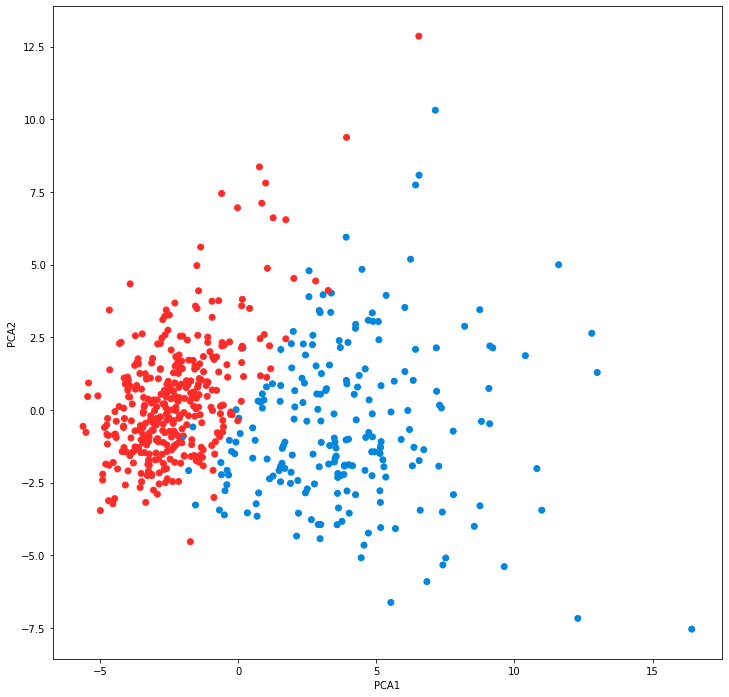

In [866]:
PCA = PCA().fit(df_scale)
PCA = PCA.transform(df_scale)
PCA1 = pc[:,0]
PCA2 = pc[:,1]
plt.figure(figsize=(12,12))
colour = ['#fe2c29' if W == 0 else '#0086db' for W in df['diagnosis']]
plt.scatter(PCA1,PCA2 ,c=colour)
plt.xlabel('PCA1')
plt.ylabel('PCA2')

# Test data ON ORIGINAL DATASET

In [867]:
X_test = (test_set[['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10',
             'F11','F12','F13','F14','F15','F16','F17','F18','F19','F20',
             'F21','F22','F23','F24','F25','F26','F27','F28','F29','F30']])
Y_test = (test_set['diagnosis'])

# 1- Logistic Regression

In [868]:
t1_LR = time.time()

In [869]:
scaler = StandardScaler()
Logistic = LogisticRegression() 
pipe = Pipeline(steps=[("scaler", scaler),("Logistic", Logistic)])
pipe.fit(X_test,Y_test) 

Pipeline(steps=[('scaler', StandardScaler()),
                ('Logistic', LogisticRegression())])

In [870]:
predictions1 = pipe.predict(X_test)

In [871]:
t2_LR = time.time()

In [872]:
train_time_LR= t2_LR-t1_LR
train_time_LR

4.497398138046265

In [873]:
print(accuracy_score(Y_test,predictions1))

0.9736842105263158


In [874]:
print(classification_report(Y_test,predictions1))
print(confusion_matrix(Y_test,predictions1))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98        61
           1       0.98      0.96      0.97        53

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

[[60  1]
 [ 2 51]]


# 2- SGD


In [1201]:
t1_DT = time.time()

In [1202]:
scaler = StandardScaler() 
sgd = SGDClassifier()
pipe = Pipeline(steps=[("scaler", scaler),("sgd", sgd)])
pipe.fit(X_test, Y_test)

Pipeline(steps=[('scaler', StandardScaler()), ('sgd', SGDClassifier())])

In [1203]:
predictions2 = pipe.predict(X_test)

In [1204]:
t2_DT = time.time()

In [1205]:
train_time_DT= t2_DT-t1_DT
train_time_DT

1.6155803203582764

In [1206]:
print(accuracy_score(Y_test,predictions2))

1.0


In [1207]:
print(classification_report(Y_test,predictions2))
print(confusion_matrix(Y_test,predictions2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00        53

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

[[61  0]
 [ 0 53]]


# 3- SVC


In [882]:
t1_SVC = time.time()

In [883]:
scaler = StandardScaler() 
svc = SVC()
pipe = Pipeline(steps=[("scaler", scaler),("svc", svc)])
pipe.fit(X_test, Y_test)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

In [884]:
predictions3 = pipe.predict(X_test)

In [885]:
t2_SVC = time.time()

In [886]:
train_time_SVC= t2_SVC-t1_SVC
train_time_SVC

3.6173949241638184

In [888]:
print(accuracy_score(Y_test,predictions3))
print(classification_report(Y_test,predictions3))
print(confusion_matrix(Y_test,predictions3))

0.956140350877193
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        61
           1       0.98      0.92      0.95        53

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.96       114
weighted avg       0.96      0.96      0.96       114

[[60  1]
 [ 4 49]]


The best model is sgd

# Test model on reduced  95%.

# 1- Logistic Regression

In [889]:
t1_LR = time.time()

In [890]:
scaler = StandardScaler()
Logistic = LogisticRegression() 
pipe = Pipeline(steps=[("scaler", scaler),("Logistic", Logistic)])
pipe.fit(X2_test,Y2_test)

Pipeline(steps=[('scaler', StandardScaler()),
                ('Logistic', LogisticRegression())])

In [891]:
predictions1 = pipe.predict(X2_test)

In [892]:
t2_LR = time.time()

In [893]:
train_time_LR= t2_LR-t1_LR
train_time_LR

3.4105889797210693

In [894]:
print(accuracy_score(Y2_test,predictions1))
print(classification_report(Y2_test,predictions1))
print(confusion_matrix(Y2_test,predictions1))

0.8596491228070176
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        61
           1       0.93      0.75      0.83        53

    accuracy                           0.86       114
   macro avg       0.87      0.85      0.86       114
weighted avg       0.87      0.86      0.86       114

[[58  3]
 [13 40]]


# 2- SGD

In [1208]:
t1_DT = time.time()

In [1209]:
scaler = StandardScaler() 
sgd = SGDClassifier()
pipe = Pipeline(steps=[("scaler", scaler),("sgd", sgd)])
pipe.fit(X2_test, Y2_test)

Pipeline(steps=[('scaler', StandardScaler()), ('sgd', SGDClassifier())])

In [1210]:
predictions2 = pipe.predict(X2_test)

In [1211]:
t2_DT = time.time()

In [1212]:
train_time_DT= t2_DT-t1_DT
train_time_DT

2.1951420307159424

In [1213]:
print(accuracy_score(Y2_test,predictions2))
print(classification_report(Y2_test,predictions2))
print(confusion_matrix(Y2_test,predictions2))

0.5877192982456141
              precision    recall  f1-score   support

           0       0.57      0.89      0.70        61
           1       0.65      0.25      0.36        53

    accuracy                           0.59       114
   macro avg       0.61      0.57      0.53       114
weighted avg       0.61      0.59      0.54       114

[[54  7]
 [40 13]]


# 3- SVC


In [907]:
t1_SVC = time.time()

In [908]:
scaler = StandardScaler() 
svc = SVC()
pipe = Pipeline(steps=[("scaler", scaler),("svc", svc)])
pipe.fit(X2_test, Y2_test)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

In [909]:
predictions3 = pipe.predict(X2_test)

In [910]:
t2_SVC = time.time()

In [911]:
train_time_SVC= t2_SVC-t1_SVC
train_time_SVC

1.7676889896392822

In [912]:
print(accuracy_score(Y2_test,predictions3))
print(classification_report(Y2_test,predictions3))
print(confusion_matrix(Y2_test,predictions3))

0.868421052631579
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        61
           1       0.93      0.77      0.85        53

    accuracy                           0.87       114
   macro avg       0.88      0.86      0.87       114
weighted avg       0.88      0.87      0.87       114

[[58  3]
 [12 41]]


The best model is svc

# Test Model 3  dimensionality to two.


# 1- Logistic Regression

In [1232]:
#X3_train, X3_test, Y3_train, Y3_test

In [1220]:
t1_LR = time.time()

In [1221]:
scaler = StandardScaler()
Logistic = LogisticRegression() 
pipe = Pipeline(steps=[("scaler", scaler),("Logistic", Logistic)])
pipe.fit(X3_test,Y3_test)

Pipeline(steps=[('scaler', StandardScaler()),
                ('Logistic', LogisticRegression())])

In [1222]:
predictions1 = pipe.predict(X3_test)

In [1223]:
t2_LR = time.time()

In [1224]:
train_time_LR= t2_LR-t1_LR
train_time_LR

1.3232910633087158

In [1225]:
print(accuracy_score(Y3_test,predictions1))
print(classification_report(Y3_test,predictions1))
print(confusion_matrix(Y3_test,predictions1))

0.868421052631579
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        61
           1       0.93      0.77      0.85        53

    accuracy                           0.87       114
   macro avg       0.88      0.86      0.87       114
weighted avg       0.88      0.87      0.87       114

[[58  3]
 [12 41]]


# 2- SGD

In [1226]:
t1_DT = time.time()

In [1227]:
scaler = StandardScaler() 
sgd = SGDClassifier()
pipe = Pipeline(steps=[("scaler", scaler),("sgd", sgd)])
pipe.fit(X3_test, Y3_test)

Pipeline(steps=[('scaler', StandardScaler()), ('sgd', SGDClassifier())])

In [1228]:
predictions2 = pipe.predict(X3_test)

In [1229]:
t2_DT = time.time()

In [1230]:
train_time_DT= t2_DT-t1_DT
train_time_DT

4.212185859680176

In [1231]:
print(accuracy_score(Y3_test,predictions2))
print(classification_report(Y3_test,predictions2))
print(confusion_matrix(Y3_test,predictions2))

0.8508771929824561
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        61
           1       0.91      0.75      0.82        53

    accuracy                           0.85       114
   macro avg       0.86      0.84      0.85       114
weighted avg       0.86      0.85      0.85       114

[[57  4]
 [13 40]]


# 3- SVC


In [1233]:
t1_SVC = time.time()

In [1234]:
scaler = StandardScaler() 
svc = SVC()
pipe = Pipeline(steps=[("scaler", scaler),("svc", svc)])
pipe.fit(X3_test, Y3_test)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

In [1235]:
predictions3 = pipe.predict(X3_test)

In [1236]:
t2_SVC = time.time()

In [1237]:
train_time_SVC= t2_SVC-t1_SVC
train_time_SVC

1.4667508602142334

In [1238]:
print(accuracy_score(Y3_test,predictions3))
print(classification_report(Y3_test,predictions3))
print(confusion_matrix(Y3_test,predictions3))

0.8596491228070176
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        61
           1       0.93      0.75      0.83        53

    accuracy                           0.86       114
   macro avg       0.87      0.85      0.86       114
weighted avg       0.87      0.86      0.86       114

[[58  3]
 [13 40]]


The best model in dimensionality to two is Logistic Regression